# Análisis Descriptivo: Análisis de Tendencias de las ventas del negocio

El análisis de tendencia es una técnica estadística que se utiliza para identificar patrones o tendencias en un conjunto de datos a lo largo del tiempo. El análisis de tendencia es utilizado para predecir la dirección futura del comportamiento de los datos basándose en su comportamiento pasado.

### Carga de las librerías de pyhton necesarias

In [2]:
# Debe instalar las librerias necesarias antes del import
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]

pd.options.display.float_format = '{:.2f}'.format

Las librerías de Python son conjuntos de código predefinidos que se utilizan para realizar tareas específicas en el lenguaje de programación Python.
Las librerías se utilizan para diferentes propósitos, como manipulación de datos, análisis de datos, visualización de datos, aprendizaje automático, desarrollo web, entre otros. 

### Conexión a SQL Server y extracción de los datos

- Explique línea a línea el código mostrado abajo. Debe explicar tambien la query. Puede probar aparte la query desde Azure Data Studio o directamente desde SQL Server Managment Studio.

In [5]:
import pyodbc
import pandas as pd


conn_str = pyodbc.connect('Driver={SQL Server};'
                          'Server=DESKTOP-MAM6T2F;'
                          'Database=AdventureWorks2019;'
                          'Trusted_Connection=yes;')


input_query = '''
SELECT
    year(t1.OrderDate) AS 'año',
    month(t1.OrderDate) AS 'mes',
    sum(t1.TotalDue) AS 'ventas'
FROM Sales.SalesOrderHeader AS t1
GROUP BY year(t1.OrderDate), month(t1.OrderDate)
ORDER BY year(t1.OrderDate), month(t1.OrderDate)
'''

# Ejecutar la consulta y almacenar los resultados en un DataFrame
ventas = pd.read_sql(input_query, conn_str)

# Mostrar los resultados
print(ventas)


     año  mes        ventas
0   2011    5  5.670209e+05
1   2011    6  5.070965e+05
2   2011    7  2.292183e+06
3   2011    8  2.800576e+06
4   2011    9  5.547916e+05
5   2011   10  5.156270e+06
6   2011   11  8.153130e+05
7   2011   12  1.462449e+06
8   2012    1  4.458337e+06
9   2012    2  1.649052e+06
10  2012    3  3.336347e+06
11  2012    4  1.871924e+06
12  2012    5  3.452924e+06
13  2012    6  4.610647e+06
14  2012    7  3.840231e+06
15  2012    8  2.442451e+06
16  2012    9  3.881724e+06
17  2012   10  2.858060e+06
18  2012   11  2.097153e+06
19  2012   12  3.176848e+06
20  2013    1  2.340062e+06
21  2013    2  2.600219e+06
22  2013    3  3.831606e+06
23  2013    4  2.840711e+06
24  2013    5  3.658085e+06
25  2013    6  5.726265e+06
26  2013    7  5.521841e+06
27  2013    8  3.733973e+06
28  2013    9  5.083505e+06
29  2013   10  5.374376e+06
30  2013   11  3.694668e+06
31  2013   12  4.560577e+06
32  2014    1  4.798028e+06
33  2014    2  1.478213e+06
34  2014    3  8.097

C:\Users\REY\AppData\Local\Temp\ipykernel_14644\759878653.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ventas = pd.read_sql(input_query, conn_str)


EXPLICACION LINEA POR LINEA

1. Para el código anterior es necesario las siguientes librerias de python, las cuales hay que importarlas:
   import pyodbc
   Es una interfaz de Python para el estándar ODBC (Open Database Connectivity). Proporciona una forma de conectar Python a bases de datos y ejecutar consultas SQL. pyodbc es muy útil para trabajar con diversas bases de datos relacionales, como SQL Server, MySQL, etc

   import pandas as pd
   Es una herramienta poderosa y versátil para el análisis de datos en Python. Es ampliamente utilizada en ciencia de datos, finanzas, investigación y muchas otras disciplinas debido a su capacidad para manipular y analizar grandes conjuntos de datos de manera eficiente. 

2. Establecer la conexion con la base de datos
   conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=T05W12;''Database=AdventureWorks2019;''Trusted_Connection=yes;') 
   'Driver={SQL Server};' - Especifica el controlador ODBC a utilizar
   'Server=T05W12;' - Especifica el nombre del servidor de la base de datos
   'Database=AdventureWorks2019;' - Especifica el nombre de la base de datos a la que se desea conectar.
   'Trusted_Connection=yes;' - Indica que se debe usar una conexión confiable (normalmente indica que se usa una autenticación de windows)

3. input_query = '''select
	 year(t1.OrderDate) as 'año', 
	 month(t1.OrderDate) as 'mes',
	 sum(t1.TotalDue) as 'ventas'
   from Sales.SalesOrderHeader as t1
	group by year(t1.OrderDate), month(t1.OrderDate) 
	order by year(t1.OrderDate), month(t1.OrderDate)'''

   Es una consulta en SQL que se almacena en la variable: input_query   

4. ventas = pd.read_sql(input_query, conn_str)

   Esta linea ejecuta la consulta SQL almacenada en la variable: 'input_query', utilizando la conexión 'conn_str' y almacena el resultado en un 'DataFrame'
   llamado 'ventas' 

5. print(ventas)   
   Se imprime el DataFrame 'ventas'



In [15]:
ventas

,año,mes,ventas
0,2011,5,567020.95
1,2011,6,507096.47
2,2011,7,2292182.88
3,2011,8,2800576.17
4,2011,9,554791.61
5,2011,10,5156269.53
6,2011,11,815313.02
7,2011,12,1462448.90
8,2012,1,4458337.44
9,2012,2,1649051.90


### El código **no** da error, sin embargo imprime un `warning` donde se sugiere el uso de `SQLAlchemy` en vez de `pyodbc`. Investigue como se hace la conexión a SQL Server con SQLAlchemy utilizando la misma base de datos , pruebe con la misma query anterior, guardar los resultados en un nuevo dataframe usando read_sql e imprima la tabla. Explicar linea por linea el código utilizado.

In [6]:
# HACIENDO USO DE SQLAlchemy

from sqlalchemy import create_engine
import pandas as pd

# Crear cadena de conexión utilizando SQLAlchemy

engine = create_engine('mssql+pyodbc://DESKTOP-MAM6T2F/AdventureWorks2019?driver=SQL+Server&Trusted_connection=yes')
    
# Definir la consulta SQL
input_query = '''
SELECT
    year(t1.OrderDate) AS año,
    month(t1.OrderDate) AS mes,
    sum(t1.TotalDue) AS ventas
FROM Sales.SalesOrderHeader AS t1
GROUP BY year(t1.OrderDate), month(t1.OrderDate)
ORDER BY year(t1.OrderDate), month(t1.OrderDate)
'''


ventas = pd.read_sql(input_query, engine)
    
print(ventas)



     año  mes        ventas
0   2011    5  5.670209e+05
1   2011    6  5.070965e+05
2   2011    7  2.292183e+06
3   2011    8  2.800576e+06
4   2011    9  5.547916e+05
5   2011   10  5.156270e+06
6   2011   11  8.153130e+05
7   2011   12  1.462449e+06
8   2012    1  4.458337e+06
9   2012    2  1.649052e+06
10  2012    3  3.336347e+06
11  2012    4  1.871924e+06
12  2012    5  3.452924e+06
13  2012    6  4.610647e+06
14  2012    7  3.840231e+06
15  2012    8  2.442451e+06
16  2012    9  3.881724e+06
17  2012   10  2.858060e+06
18  2012   11  2.097153e+06
19  2012   12  3.176848e+06
20  2013    1  2.340062e+06
21  2013    2  2.600219e+06
22  2013    3  3.831606e+06
23  2013    4  2.840711e+06
24  2013    5  3.658085e+06
25  2013    6  5.726265e+06
26  2013    7  5.521841e+06
27  2013    8  3.733973e+06
28  2013    9  5.083505e+06
29  2013   10  5.374376e+06
30  2013   11  3.694668e+06
31  2013   12  4.560577e+06
32  2014    1  4.798028e+06
33  2014    2  1.478213e+06
34  2014    3  8.097

EXPLICACION LINEA POR LINEA DEL CODIGO USANDO LA LIBRERIA SQLAlchemy

1. from sqlalchemy import create_engine
    Esta línea importa la función 'create_engine' del módulo 'sqlalchemy'

2. import pandas as pd
    Esta línea importa la biblioteca 'pandas' y le asigna el alias 'pd'.

3. engine = create_engine('mssql+pyodbc://T05W12/AdventureWorks2019?driver=SQL+Server&Trusted_connection=yes')
    Se hace uso de la función 'create_engine' para crear la instancia 'engine' la cual permite la conexion con la base de datos 'AdventureWorks2019' de un servidor de SQL Server

4. input_query = '''select
	 year(t1.OrderDate) as 'año', 
	 month(t1.OrderDate) as 'mes',
	 sum(t1.TotalDue) as 'ventas'
   from Sales.SalesOrderHeader as t1
	group by year(t1.OrderDate), month(t1.OrderDate) 
	order by year(t1.OrderDate), month(t1.OrderDate)'''

	Es una consulta en SQL que se almacena en la variable: input_query  

5. ventas = pd.read_sql(input_query, engine)
   Esta linea ejecuta la consulta SQL almacenada en la variable: 'input_query', utilizando la conexión 'engine' y almacena el resultado en un 'DataFrame'
   llamado 'ventas' 

6. print(ventas)
   Imprime el DataFrame 'ventas'
	

### Exploración del dataset extraído (ventas)

- Muestre la información general del dataframe (info):

In [49]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   año     38 non-null     int64  
 1   mes     38 non-null     int64  
 2   ventas  38 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.0 KB


- Imprima un resumen de las principales estadisticas descriptivas para el dataframe ventas: count, mean, std, min, 25%,  50%, 75%, max. Explique e interprete la salida. 

In [50]:
print(ventas.describe())

               año        mes        ventas
count    38.000000  38.000000  3.800000e+01
mean   2012.421053   6.447368  3.242547e+06
std       1.003550   3.414574  1.787701e+06
min    2011.000000   1.000000  5.415148e+04
25%    2012.000000   4.000000  2.013703e+06
50%    2012.000000   6.000000  3.256598e+06
75%    2013.000000   9.000000  4.535017e+06
max    2014.000000  12.000000  8.097036e+06


- Mostrar las dimensiones del dataset

In [51]:
print(ventas.shape)

(38, 3)


- Imprimir en un objeto tipo Index todas las columnas del dataframe

In [52]:
print(ventas.columns)

Index(['año', 'mes', 'ventas'], dtype='object')


- Muestre el contenido de las primeras 15 líneas del dataframe

In [7]:
print(ventas.head(15))

     año  mes        ventas
0   2011    5  5.670209e+05
1   2011    6  5.070965e+05
2   2011    7  2.292183e+06
3   2011    8  2.800576e+06
4   2011    9  5.547916e+05
5   2011   10  5.156270e+06
6   2011   11  8.153130e+05
7   2011   12  1.462449e+06
8   2012    1  4.458337e+06
9   2012    2  1.649052e+06
10  2012    3  3.336347e+06
11  2012    4  1.871924e+06
12  2012    5  3.452924e+06
13  2012    6  4.610647e+06
14  2012    7  3.840231e+06


- Muestre las últimas cinco líneas del dataframe

In [9]:
print(ventas.tail(5))


     año  mes        ventas
33  2014    2  1.478213e+06
34  2014    3  8.097036e+06
35  2014    4  1.985886e+06
36  2014    5  6.006183e+06
37  2014    6  5.415148e+04


- Calcule Correlaciones y Covarianzas. Explicar resultados

In [55]:
print("CORRELACIONES")
print("-------------")
print(ventas.corr())
print()
print("COVARIANZAS")
print("-----------")
print(ventas.cov())




CORRELACIONES
-------------
             año       mes    ventas
año     1.000000 -0.403492  0.418327
mes    -0.403492  1.000000 -0.039554
ventas  0.418327 -0.039554  1.000000

COVARIANZAS
-----------
                  año            mes        ventas
año          1.007112      -1.382646  7.504982e+05
mes         -1.382646      11.659317 -2.414469e+05
ventas  750498.189751 -241446.928150  3.195875e+12


- En la matriz de correlacion se puede observar que entre 'ventas' y 'año' existe una correlación muy baja de 0.42 lo ual indica que los incrementos o disminuciones de ventas no tienen que ver con el trancurso de los años.
- El mismo analisis anterior, se puede notar con los 'meses', donde la correlación es de -0.039.
En resumen el eincremento o disminución de las ventas no está relacionado con el 'tiempo'

- En cuanto a la covarianza entre las 'ventas' y 'año' nos dice que a medida que aumenta los 'año' aumenta las 'ventas' y viceversa, lo contrario de 'ventas' y 'mes', donde a medida que aumenta los 'meses' disminuyes las 'ventas' y 'vicevera', es decir, una tendencia positiva en los años y negativa en los meses, pero es obvio que para una evaluación mas completa , aqui determima primeramente el coeficiente de correlacion y lo que nos dice el coeficiente de correlación es que no existe ninguna relacion entre 'ventas' y 'tiempo'; se deduce entones que los resultados de las covarianzas no son 'causales'.

## Visualización gráfica de los datos

### Gráfico de barras de las ventas por mes

Se realiza una exploración visual de curva que dibuja las ventas agrupadas por mes.

- Explique línea por línea el siguiente código:

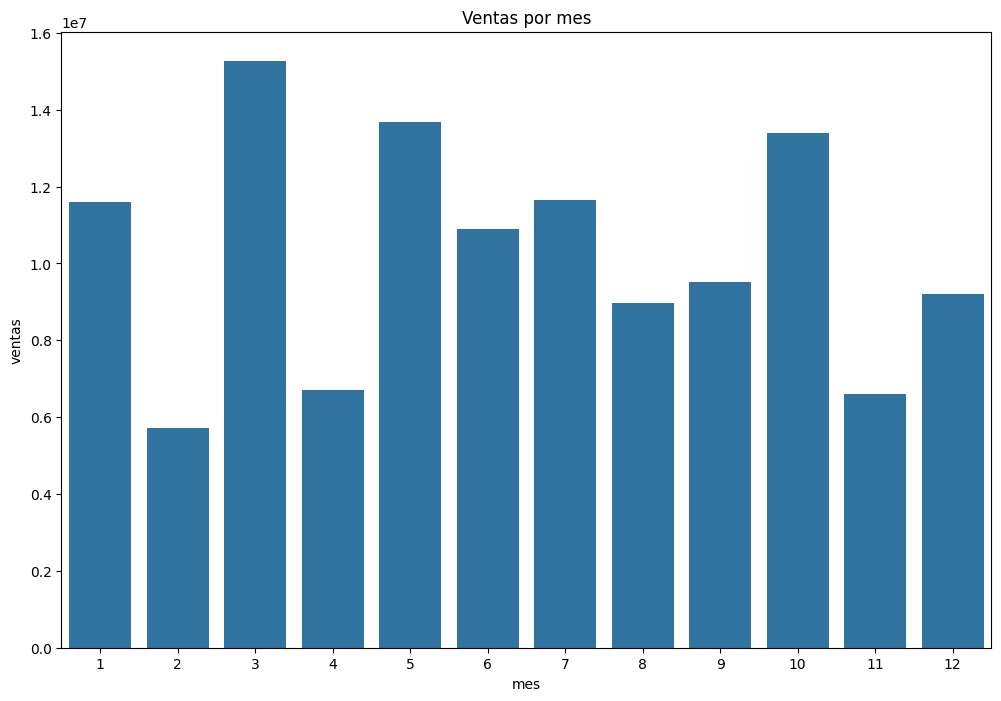

In [5]:
ventas_por_mes = ventas.groupby('mes')['ventas'].sum().reset_index()
sns.barplot(x='mes', y='ventas', data=ventas_por_mes)
plt.title('Ventas por mes')
plt.show()

EXPLICACION LINEA POR LINEA:

- ventas_por_mes = ventas.groupby('mes')['ventas'].sum().reset_index()
En el DataFrame, agrupa y suma las ventas por 'meses'; reinicia los índices para que 'mes' sea una columna regular en lugar de ser el 'indice'

- sns.barplot(x='mes', y='ventas', data=ventas_por_mes)
Utiliza la función 'barplot' de la biblioteca 'Seaborn' para crear un gráfico de barras. Aquí está la explicación detallada de esta línea:

- plt.title('Ventas por mes')
Crea el Titulo del gráfico de barras.

- plt.show()
Muestra el gráfico por pantalla


- Interpretar o explicar lo que el gráfico de arriba 'esta diciendo'.

- En el eje 'horizontal' de distribuyen los doce meses del año y por cada mes se levanta una barra hasta la altura marcada en el 'eje vertical' que identifica el volúmen de las ventas.

- Asi podemos ver de primer impacto, que 'marzo' es el mes donde se 'vendió más', asi como, 'febrero' fue el mes donde se 'vendió menos'.

### Gráfico de línea de las ventas por año

Se observa la curva que dibuja la evolución de las ventas agrupadas por año.

- Explique línea por línea el siguiente código:

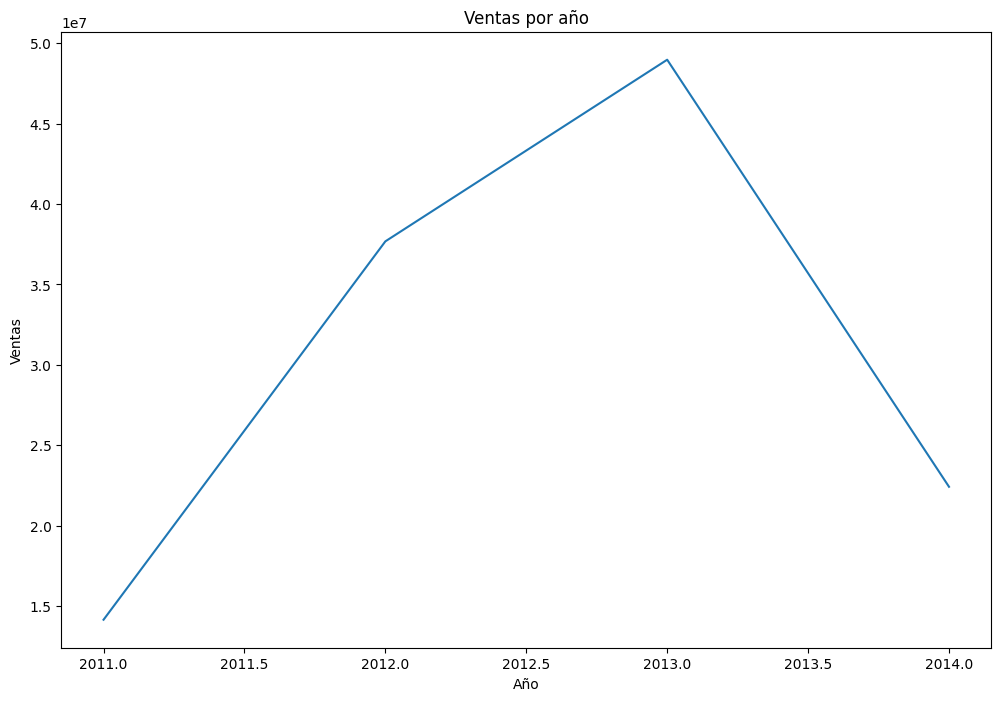

In [6]:
ventas_por_año = ventas.groupby('año')['ventas'].sum().reset_index()
plt.plot(ventas_por_año['año'], ventas_por_año['ventas'])
plt.title('Ventas por año')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.show()

EXPLICACION LINEA POR LINEA:

- ventas_por_año = ventas.groupby('año')['ventas'].sum().reset_index()
En el DataFrame, agrupa y suma las ventas por 'años'; reinicia los índices para que 'año' sea una columna regular en lugar de ser el 'indice'

- plt.plot(ventas_por_año['año'], ventas_por_año['ventas'])
Utiliza la biblioteca Matplotlib para crear un gráfico de líneas

- plt.title('Ventas por año')
Crea el Titulo del gráfico de lineas.

- plt.xlabel('Año')
Este codigo es para etiquetar 'el eje x' o 'horizontal' del gráfico creado por Matplotlib, en este caso lo etiqueta con 'Año'

- plt.ylabel('Ventas')
Este codigo es para etiquetar 'el eje y' o 'vertical' del gráfico creado por Matplotlib, en este caso lo etiqueta con 'Ventas'

- plt.show()
Muestra el gráfico por pantalla


- Interpretar o explicar lo que el gráfico de arriba 'esta diciendo'.

- El gráfico de línea nos está diceindo que el punto mas alto de las ventas se alcanzó aproximadamente en el primer 'mes' del año '2013' con aproximadamente '4.9'

- Que a partir del año '2013', las 'ventas' anuales comenzaron a bajar de forma lineal.

- El punto más bajo de ventas, es decri, donde se vendió menos fué aproximadamente, a finales del '2011', con ventas aproximadas de '1.4'

### Prueba formal: Prueba de tendencia

Existen diferentes métodos para realizar el análisis de tendencia, pero uno de los más utilizados es la regresión lineal. La regresión lineal es una técnica estadística que se utiliza para encontrar la relación entre una variable dependiente (por ejemplo, el precio de una acción) y una o más variables independientes (por ejemplo, el tiempo).

Se realiza una prueba de tendencia utilizando la función linregress de la biblioteca scipy.stats. Esta función calcula la pendiente de una línea de regresión lineal y el valor p asociado, que indica la probabilidad de que la pendiente sea cero. Si el valor p es menor que 0,05, se concluye que hay evidencia de una tendencia significativa en los datos.

- Explicar el siguiente código:

In [10]:
from scipy.stats import linregress

pendiente, intercepto, Coef_corr, probabilidad, error_estandar = linregress(ventas['año'], ventas['ventas'])
print('Coeficiente de correlación: ', Coef_corr)
print('Intercepto: ', intercepto)
print('Pendiente: ', pendiente)
print('Valor de probabilidad: ', probabilidad)

if probabilidad < 0.05:
    print('La tendencia es significativa')
else:
    print('No hay evidencia de tendencia significativa')

Coeficiente de correlación:  0.41832692838621466
Intercepto:  -1496409719.9225278
Pendiente:  745198.0612926556
Valor de probabilidad:  0.008957361661883
La tendencia es significativa


- Podemos ver que aunque el coeficiente de correlación es bajo de '0.4', hay significación estadistica entre 'ventas' y 'año', por lo cual podemos
concluir que el coeficiente de correlasión no es concluyente para definir si el modelo de regresión sirve para predecir.

- Existe otra medida estadistica, 'Coeficiente de detrminación' (R-square), que determina que proporcion de la varianza de la variable dependiente 'Y' (ventas) es explicada por la variable independiente 'X' (año)

- R-square = Coef_corr**2 = 0.4183269 ** 2 = 0.1749 

- En nuestro caso el 'coeficiente de determinación' (R-square) da un valor de: 0.17499, que me dice que el 17.5% de los cambios de las 'ventas' estan determinado por el cambio de los 'años'

EXPLICACION LINEA POR LINEA:

- pendiente, intercepto, Coef_corr, probabilidad, error_estandar = linregress(ventas['año'], ventas['ventas'])
Realiza una regresión lineal simple utilizando la función 'linregress' del módulo 'scipy.stats'. Devolviendo los resultados de:
pendiente, intercepto, Coef_corr (Coeficiente de correlación), probabilidad (probabilidad marginal) y error_estandar (representa la variabilidad esperada en la estimación si se repitiera
el experimento de muestreo muchas veces)

- print('Coeficiente de correlación: ', Coef_corr)
  print('Intercepto: ', intercepto)
  print('Pendiente: ', pendiente)
  print('Valor de probabilidad: ', probabilidad)

Se imprimen cada uno de los valores devuelto por la función.

- if probabilidad < 0.05:
    print('La tendencia es significativa')
 else:
    print('No hay evidencia de tendencia significativa')

Se compara la 'probabilidad marginal' 'probabilidad' con 0.05 (5%), para ver si se rechaza o no la Hipotesis nula de que no exista diferencias significativa en los estimadores (coef = 0).
Si la probabilidad < 0.05 cae en zona de rechazo por ende existen diferencias significativas entre  las variables 'dependiente' e 'independientes', es decir, que los años tienen efectos significativo sobre las ventas. 

Sin embargo esto no garantiza que el modelo en su totalidad sea bueno, o el mejor modelo posible, para esto se necesita ademas de R-square:

- Un analisis de los factores independientes, es decir, pruebas t-studen para cada variable independiente del modelo (en caso que tenga mas de una)

- Y probar el cumplimiento de los supuestos del modelo tales como:
  . Linealidad
  . Independencia de los errores
  . Homocedasticidad
  . Normalidad de los errores

Modelo de Regresión:

Ventas = -1496409719.9225278 + 745198.0612926556 * año


## Conclusiones

Luego del análisis realizado se puede concluir que la *pendiente* de **745198.0612926556** indica que hay un aumento en las ventas por año en la base de datos AdventureWorks2019. Es decir, en promedio, las ventas están aumentando en **745198.06 unidades por año**.

El *valor p* de **0.008957361661882999** indica que la probabilidad de obtener una pendiente tan grande como la observada en los datos si la pendiente real es cero es de aproximadamente **0.9%**. Como este valor p es menor que el nivel de significancia comúnmente utilizado de *0,05*, se concluye que hay evidencia suficiente para afirmar que hay una tendencia significativa en los datos.

***Por lo tanto, se puede afirmar que las ventas de AdventureWorks2019 están aumentando significativamente con el tiempo.***

## Recomendaciones

Dado que las ventas están aumentando significativamente con el tiempo, una recomendación para la empresa podría ser continuar invirtiendo en áreas clave para mantener esta tendencia positiva. Por ejemplo, la empresa podría considerar:

* *Mejorar el marketing*: la empresa podría invertir en esfuerzos de marketing para aumentar la conciencia de marca y atraer a más clientes potenciales.

* *Expandir la oferta de productos*: si la empresa ve un aumento en las ventas en ciertas categorías de productos, podría considerar expandir su oferta en esas áreas para aprovechar esa tendencia.

* *Optimizar la cadena de suministro*: si la empresa ve una tendencia a largo plazo de aumento en las ventas, podría considerar optimizar su cadena de suministro para garantizar que pueda satisfacer la demanda futura y mantener su nivel de servicio al cliente.

* *Fomentar la fidelidad del cliente*: la empresa podría implementar programas de lealtad para fomentar la fidelidad del cliente y aumentar la retención.

* *Explorar nuevos canales de venta*: la empresa podría considerar expandir su presencia en línea o abrir nuevas tiendas para aprovechar la tendencia positiva en las ventas.

En general, la recomendación sería que la empresa mantenga un enfoque en la comprensión y la satisfacción de las necesidades de sus clientes, así como en la eficiencia operativa, a medida que busca capitalizar en la tendencia positiva en las ventas.

- Efectuar nuevas consultas sql (desde **Azure Data Studio** o desde **SQL Server Managment Studio**).  Suponga que aún no le han informado del objetivo negocio, por lo tanto debe en primer lugar entender los datos que tiene. Explorar los datos que tienes en la misma base de datos **AdventureWorks2019** y ver que información relevante y de utilidad se puede extraer de allí. Guardar la(s) query(s) final(es) y luego pasarlo a `SQLALchemy` para obtener un dataframe final sobre el cual vas a realizar análisis descriptivos (con pandas) como los efectuados en el caso expuesto arriba. Los plots son opcionales. Elaborar conclusiones y recomendaciones sobre el potencial de tus resultados.   

EL SIGUIENTE CASO ES UN ESTUDIO ENTRE LA CANTIDAD DE PRODUCTOS QUE SE COMPRAN Y LA CANTIDAD DEPRODUCTOS QUE SE VENDEN MENSUALMENTE

 MES  CANT_COMPRAS  CANT_VENTAS
   1           672        10266
   2           666         6657
   3           799        13899
   4           784         8346
   5           890        13499
   6           944        10696
   7           947        10961
   8          1103         8760
   9           688         9611
  10           359        11453
  11           324         7941
  12           669         9228


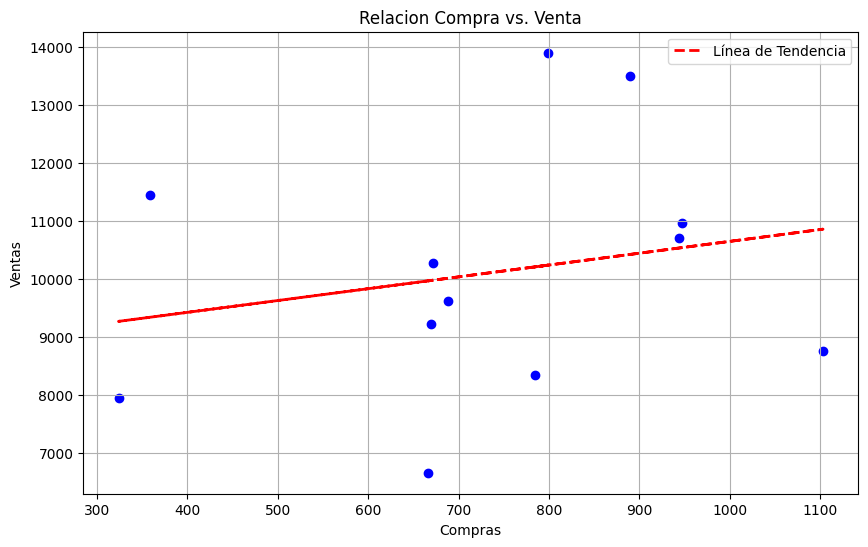

In [29]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Crear cadena de conexión utilizando SQLAlchemy

engine = create_engine('mssql+pyodbc://DESKTOP-MAM6T2F/AdventureWorks2019?driver=SQL+Server&Trusted_connection=yes')
    
# Definir la consulta SQL
query_compras = '''
SELECT Month(h.ModifiedDate) AS MES, COUNT(*) AS CANT_COMPRAS
FROM [Purchasing].[PurchaseOrderHeader] h
INNER JOIN [Purchasing].[PurchaseOrderDetail] hd
ON h.PurchaseOrderID = hd.PurchaseOrderID
GROUP BY Month(h.ModifiedDate)
ORDER BY MES;
'''

query_ventas= ''' 
SELECT Month(h.OrderDate) AS MES, COUNT(*) AS CANT_VENTAS
FROM [Sales].[SalesOrderHeader] h
INNER JOIN [Sales].[SalesOrderDetail] hd
ON h.SalesOrderID=hd.SalesOrderID
GROUP BY Month(h.OrderDate)
ORDER BY MES;
'''


compras = pd.read_sql(query_compras, engine)

ventas = pd.read_sql(query_ventas, engine)

# Eliminando índices
compras.reset_index(drop=True, inplace=True)    
ventas.reset_index(drop=True, inplace=True)

# Uniendo DataFrame
relacion_compra_venta= pd.merge(compras, ventas, on='MES')
    
#print(compras)
#print()
#print(ventas)
#print()
print(relacion_compra_venta.to_string(index=False))

plt.figure(figsize=(10, 6)) #Define el tamaño de la figura

# GRAFICO DE LINEA
# plt.plot(relacion_compra_venta['CANT_COMPRAS'], relacion_compra_venta['CANT_VENTAS'], marker='o') #marker = 'o' Dibuja un gráfico de lineas con marcadores en los puntos de datos

# GRAFICO DE DISPERSION
plt.scatter(relacion_compra_venta['CANT_COMPRAS'], relacion_compra_venta['CANT_VENTAS'], c='blue', marker='o')

plt.title('Relacion Compra vs. Venta')
plt.xlabel('Compras')
plt.ylabel('Ventas')


# AJUSTAR UNA LINEA DE TENDENCIA
x = relacion_compra_venta['CANT_COMPRAS']
y = relacion_compra_venta['CANT_VENTAS']
coefficients = np.polyfit(x, y, 1)        # Ajustar una línea de tendencia lineal
polynomial = np.poly1d(coefficients)      # Crear un objeto de polinomio
trendline = polynomial(x)                 # Generar valores de la línea de tendencia

plt.plot(x, trendline, color='red', linestyle='--', linewidth=2, label='Línea de Tendencia')

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()



In [30]:
# ANALISIS DE REGRESION LINEAL
pendiente, intercepto, Coef_corr, probabilidad, error_estandar = linregress(relacion_compra_venta['CANT_COMPRAS'], relacion_compra_venta['CANT_VENTAS'])
print('Coeficiente de correlación: ', Coef_corr)
print('Intercepto: ', intercepto)
print('Pendiente: ', pendiente)
print('Valor de probabilidad: ', probabilidad)

if probabilidad < 0.05:
    print('La tendencia es significativa')
else:
    print('No hay evidencia de tendencia significativa')



Coeficiente de correlación:  0.21698912732489867
Intercepto:  8605.33004765899
Pendiente:  2.0410445933399806
Valor de probabilidad:  0.4981380795731385
No hay evidencia de tendencia significativa


En este resultado nos dice que no hay relación entre la cantidad de productos que se compran en el mes y la cantidad de ventas.

In [ ]:
relacion_compra_venta['CANT_VENTAS'].corr(relacion_compra_veta['CANT_COMPRAS'])